# Create the Bayesian Network

In [1]:
import pandas as pd
import pickle
from pgmpy.models import BayesianNetwork
import networkx as nx
from utils import hierarchical_layout,draw_graph

# Import the pre-processed dataset and its values mapping
data = pd.read_csv("./datasets/dataset_final.csv")
with open('./datasets/label_mappings.pkl', 'rb') as f: label_mappings = pickle.load(f)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define Models

1. [Model-1: Baseline network](#model-1-baseline-network)
2. [Model-2: Network with a latent variable ](#model-2-network-with-a-latent-variable)

### Model-1: Baseline network

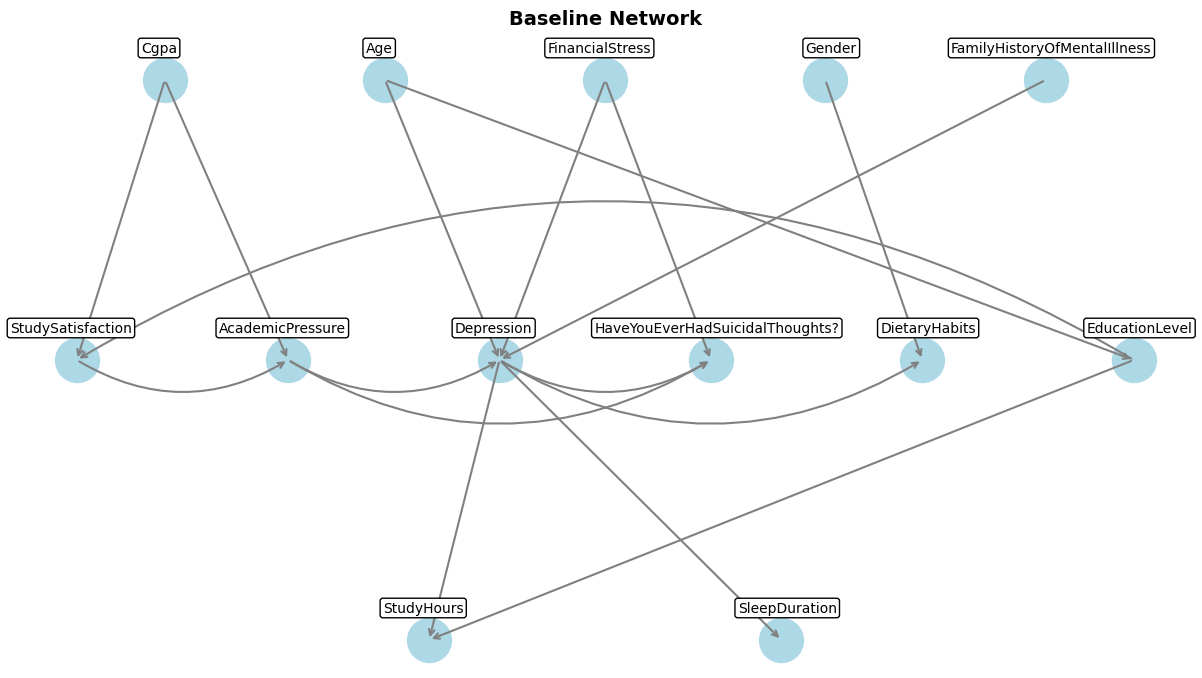

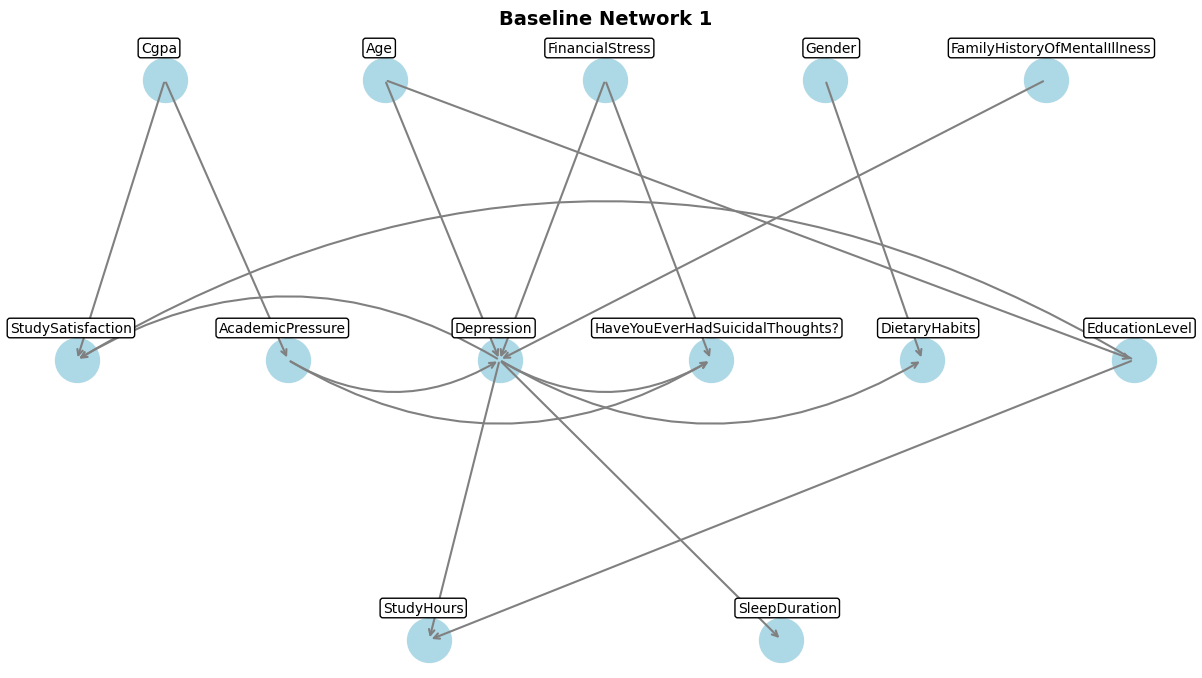

In [2]:
# Define the network structure
network_baseline = [
    ("Depression","HaveYouEverHadSuicidalThoughts?"),
    ("StudySatisfaction","AcademicPressure"),
    ("Cgpa", "StudySatisfaction"),
    ("AcademicPressure","Depression"),
    ("Cgpa","AcademicPressure"),
    ("Age","EducationLevel"),
    ("FinancialStress","Depression"),
    ("AcademicPressure","HaveYouEverHadSuicidalThoughts?"),
    ("Age","Depression"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    ("FinancialStress","HaveYouEverHadSuicidalThoughts?"),
    #("Depression","StudySatisfaction"),
    ("EducationLevel","StudySatisfaction"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    ("EducationLevel","StudyHours"),
    ("Gender","DietaryHabits"),
    ("FamilyHistoryOfMentalIllness","Depression"),
    ('Depression','SleepDuration')
]

network_baseline1 = [
    ("Depression","HaveYouEverHadSuicidalThoughts?"),
    #("StudySatisfaction","AcademicPressure"),
    ("Cgpa", "StudySatisfaction"),
    ("AcademicPressure","Depression"),
    ("Cgpa","AcademicPressure"),
    ("Age","EducationLevel"),
    ("FinancialStress","Depression"),
    ("AcademicPressure","HaveYouEverHadSuicidalThoughts?"),
    ("Age","Depression"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    ("FinancialStress","HaveYouEverHadSuicidalThoughts?"),
    ("Depression","StudySatisfaction"),
    ("EducationLevel","StudySatisfaction"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    ("EducationLevel","StudyHours"),
    ("Gender","DietaryHabits"),
    ("FamilyHistoryOfMentalIllness","Depression"),
    ('Depression','SleepDuration')
]

# Build the network
BN_baseline = BayesianNetwork(network_baseline)
BN_baseline1 = BayesianNetwork(network_baseline1)

# Plot its graph
G = nx.DiGraph()
G.add_edges_from(BN_baseline.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos, title="Baseline Network")

G = nx.DiGraph()
G.add_edges_from(BN_baseline1.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos, title="Baseline Network 1")

### Model 2: Network with a latent variable

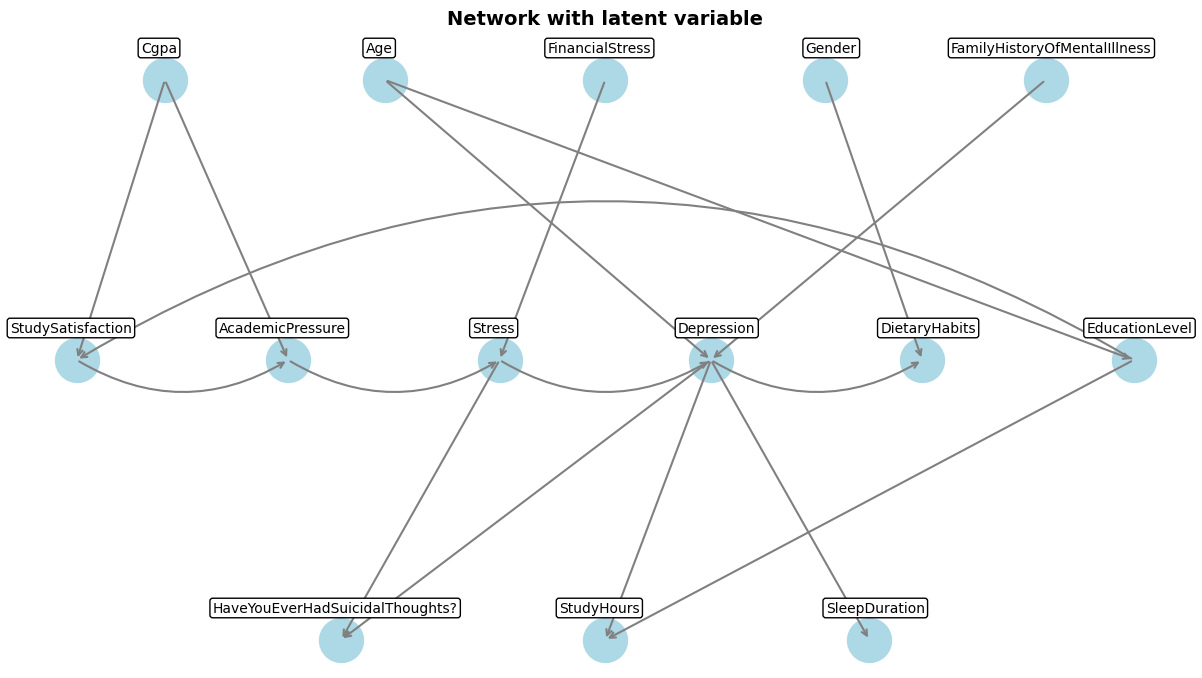

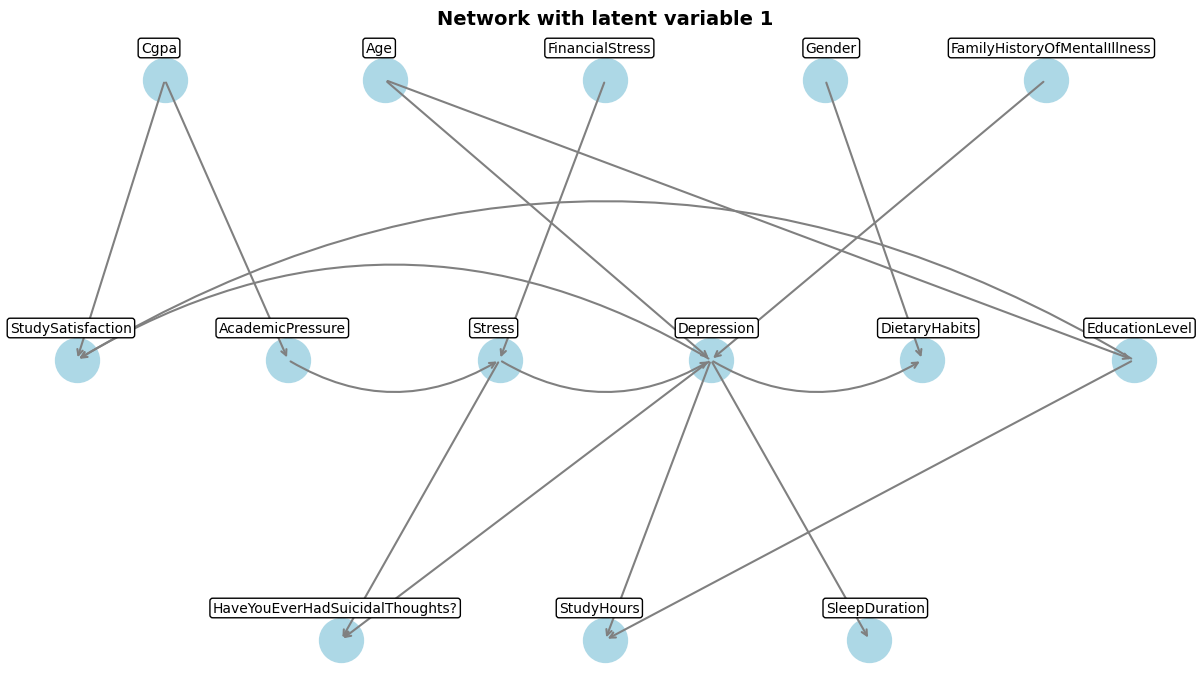

In [3]:
from pgmpy.factors.discrete import TabularCPD

# Define the network structure
network_latent = [
    ("Depression","HaveYouEverHadSuicidalThoughts?"),
    ("StudySatisfaction","AcademicPressure"),
    ("Cgpa", "StudySatisfaction"),
    ("AcademicPressure","Stress"),                              # added Stress
    ("Stress","Depression"),                                    # added Stress
    ("Cgpa","AcademicPressure"),
    ("Age","EducationLevel"),
    ("FinancialStress","Stress"),                               # added Stress
    ("Stress","Depression"),                                    # added Stress
    #("AcademicPressure","HaveYouEverHadSuicidalThoughts?"),
    ("Age","Depression"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    #("FinancialStress","HaveYouEverHadSuicidalThoughts?"),
    ("Stress","HaveYouEverHadSuicidalThoughts?"),
    #("Depression","StudySatisfaction"),
    ("EducationLevel","StudySatisfaction"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    ("EducationLevel","StudyHours"),
    ("Gender","DietaryHabits"),
    ("FamilyHistoryOfMentalIllness","Depression"),
    ('Depression','SleepDuration')
]

network_latent1 = [
    ("Depression","HaveYouEverHadSuicidalThoughts?"),
    #("StudySatisfaction","AcademicPressure"),
    ("Cgpa", "StudySatisfaction"),
    ("AcademicPressure","Stress"),                              # added Stress
    ("Stress","Depression"),                                    # added Stress
    ("Cgpa","AcademicPressure"),
    ("Age","EducationLevel"),
    ("FinancialStress","Stress"),                               # added Stress
    ("Stress","Depression"),                                    # added Stress
    #("AcademicPressure","HaveYouEverHadSuicidalThoughts?"),
    ("Age","Depression"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    #("FinancialStress","HaveYouEverHadSuicidalThoughts?"),
    ("Stress","HaveYouEverHadSuicidalThoughts?"),
    ("Depression","StudySatisfaction"),
    ("EducationLevel","StudySatisfaction"),
    ("Depression","DietaryHabits"),
    ("Depression","StudyHours"),
    ("EducationLevel","StudyHours"),
    ("Gender","DietaryHabits"),
    ("FamilyHistoryOfMentalIllness","Depression"),
    ('Depression','SleepDuration')
]

# Build the network
BN_latent = BayesianNetwork(network_latent, latents=["Stress"])
BN_latent1 = BayesianNetwork(network_latent1, latents=["Stress"])

# Plot its graph
R = nx.DiGraph()
R.add_edges_from(BN_latent.edges())
pos = hierarchical_layout(R, horizontal_spacing=3.0)
draw_graph(R, pos, title="Network with latent variable")

R = nx.DiGraph()
R.add_edges_from(BN_latent1.edges())
pos = hierarchical_layout(R, horizontal_spacing=3.0)
draw_graph(R, pos, title="Network with latent variable 1")

## Fit Models

In [4]:
models = {
    "Baseline Network" : BN_baseline, 
    "Baseline Network 1": BN_baseline1, 
    "Network with latent variable" : BN_latent, 
    "Network with latent variable 1" : BN_latent1,
}
# Exlude attributes that we reconsidered as unuseful
data_new = data.drop(columns=["EducationCategory", "Regions"])  
random_seed = 42

### PS: BayesianEstimator vs ExpectationMaximization on fully observed BN

In [ ]:
import numpy as np
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import ExpectationMaximization

import copy

BN_copy_BE = copy.deepcopy(BN_baseline) # Work on a separate copy
be = BayesianEstimator(BN_copy_BE, data_new)
BE_estimation = be.get_parameters()

BN_copy_EM = copy.deepcopy(BN_baseline) # Work on a separate copy
em = ExpectationMaximization(BN_copy_EM, data_new)
EM_estimation = em.get_parameters(seed=random_seed, show_progress=False)

set1 = {cpd.variable: cpd for cpd in BE_estimation}
set2 = {cpd.variable: cpd for cpd in EM_estimation}

avg_diff = {}

for var in set1.keys():
    values1 = np.array(set1[var].values)
    values2 = np.array(set2[var].values)
    avg_diff[var] = np.mean(np.abs(values1 - values2)/np.abs(values1))*100 # Normalized wrt BE (exact ?)

print(f"Average error over all attributes: {np.mean(list(avg_diff.values())):.2f}%")
df_avg_diff = pd.DataFrame({"Attribute":avg_diff.keys(), "Error (%)":avg_diff.values()})
display(df_avg_diff)

### Fitting

In [6]:
# Setting parameters more easily
fitting_params = {
    "Baseline Network" : {
        "estimator" : BayesianEstimator,
        "params" : {}
    },
    "Baseline Network 1" : {
        "estimator" : BayesianEstimator,
        "params" : {}
    },
    "Network with latent variable" : {
        "estimator" : ExpectationMaximization,
        "params" : {
            "seed": random_seed, 
            "show_progress": False,
            "latent_card":{"Stress": 5},
        }
    }, 
    "Network with latent variable 1" : {
        "estimator" : ExpectationMaximization,
        "params" : {
            "seed": random_seed, 
            "show_progress": False,
            "latent_card":{"Stress": 5},
        }
    }, 
}

In [7]:
import os

param_file = "trained_models.pkl"

# Check if model parameters are already computed
if os.path.exists(param_file):
    with open(param_file, "rb") as f:
        trained_params = pickle.load(f)
else:
    trained_params = {}

# Fit each model at its best
for name, mod in models.items():
    print(f'Model "{name}"')
    if name in trained_params:
        mod.cpds = trained_params[name]
        print(f'\tLoaded pre-trained parameters')
    else:
        # Generali estimation
        estimator = fitting_params[name]["estimator"](mod, data_new)
        estimated_params = estimator.get_parameters(**fitting_params[name]["params"])
        
        mod.cpds = estimated_params
        trained_params[name] = estimated_params
        print(f'\tTrained and saved')

    if not mod.check_model():
        print(f'\tCheck failed')

# Save updated trained parameters
with open(param_file, "wb") as f:
    pickle.dump(trained_params, f)

Model "Baseline Network"
	Loaded pre-trained parameters
Model "Baseline Network 1"
	Loaded pre-trained parameters
Model "Network with latent variable"
	Loaded pre-trained parameters
Model "Network with latent variable 1"
	Loaded pre-trained parameters


### PS: Approximation of `pgmpy.metrics,log_likelihood_score` for networks with latents

In [ ]:
# Log functions comparison
from utils import log_like_score
from pgmpy.metrics import log_likelihood_score

res_pgmpy = log_likelihood_score(BN_baseline, data_new)
res_ours = log_like_score(BN_baseline, data_new, show_progress=True)
res_pgmpy1 = log_likelihood_score(BN_baseline1, data_new)
res_ours1 = log_like_score(BN_baseline1, data_new, show_progress=True)

In [ ]:
rel_err = np.abs(res_ours-res_pgmpy) / np.abs(res_pgmpy) 
rel_err1 = np.abs(res_ours1-res_pgmpy1) / np.abs(res_pgmpy1) 

print(f"Log-score (pgmpy): {res_pgmpy}")
print(f"Log-score (ours): {res_ours}")
print(f"Relative error: {rel_err*100:.2f}% (wrt to pgmpy)\n")
print(f"Log-score (pgmpy): {res_pgmpy1}")
print(f"Log-score (ours): {res_ours1}")
print(f"Relative error: {rel_err1*100:.2f}% (wrt to pgmpy)")

In [ ]:
# Bic score comparison
from utils import compute_bic
from pgmpy.estimators import BicScore

res_pgmpy_bic = BicScore(data_new).score(BN_baseline)
res_ours_bic = compute_bic(BN_baseline, data_new, log_like_precomputed=res_ours)
res_pgmpy_bic1 = BicScore(data_new).score(BN_baseline1)
res_ours_bic1 = compute_bic(BN_baseline1, data_new, log_like_precomputed=res_ours1)

In [ ]:
rel_err_bic = np.abs(res_ours_bic-res_pgmpy_bic) / np.abs(res_pgmpy_bic) 
rel_err_bic1 = np.abs(res_ours_bic1-res_pgmpy_bic1) / np.abs(res_pgmpy_bic1) 

print(f"BIC-score (pgmpy): {res_pgmpy_bic}")
print(f"BIC-score (ours): {res_ours_bic}")
print(f"Relative error: {rel_err_bic*100:.2f}% (wrt to pgmpy)\n")
print(f"BIC-score (pgmpy): {res_pgmpy_bic1}")
print(f"BIC-score (ours): {res_ours_bic1}")
print(f"Relative error: {rel_err_bic1*100:.2f}% (wrt to pgmpy)")

## Evaluate Models

In [ ]:
from utils import count_bn_parameters, mean_d_separation, compute_sparsity_score, compute_accuracy
from pgmpy.metrics import structure_score
evaluation_df = pd.DataFrame({
    "Scores" : [
        "Number of params",
        "Average D-sep nodes",
        "Sparsity score",
        "Log-likelihood",
        "BIC score",
        "Prediction accuracy"
    ]
})

for name, mod in models.items():    
    n_params = count_bn_parameters(mod)
    d_sep_score = mean_d_separation(mod)
    sparsity_score = compute_sparsity_score(mod)
    log_like = log_like_score(mod, data_new, show_progress=False)
    bic = compute_bic(mod, data_new,log_like_precomputed=log_like) 
    accuracy = compute_accuracy(
        mod, 
        data_new, 
        target_col="Depression",
        train_size=0.8,
        seed=random_seed,
        fitting_params=fitting_params[name],
        show_progress=False
    )
    evaluation_df[name] = [
        n_params,
        d_sep_score,
        sparsity_score,
        log_like,
        bic,
        accuracy
    ]

In [ ]:
evaluation_df

### Observations

- **Number of free parameters**

    $$\text{Total Parameters} = \sum_{X \in \text{nodes(BN)}} (r_X - 1) \times Q_X$$

    Where:
    - $r_X$ is the number of states of node $X$,
    - $Q_X$ is the product of the cardinalities of its parents.

    We can notice a great decrease in the number of parameters passing from Baseline models to Latent models (memory usage considerations?).

- **Average number of D-separated nodes**

    $$\text{Mean D-Separation} = \frac{\text{Number of d-separated node pairs}}{\text{Total number of node pairs}}$$

    There is a slight increase in the average number of D-separated nodes, but the scores are still much closer to 0 than to 1, meaning that most node pairs are d-connected, meaning that information can propagate easily through the network.

- **Sparsity score**

    $$\text{Sparsity Score} = 1 - \frac{\text{Number of edges in the network}}{\text{Maximum possible edges}}$$

    Where:
    - $\text{Maximum possible edges} = \frac{n(n-1)}{2}$
    - $n$ is the number of nodes in the Bayesian Network.

    Sparsity increase with latency meanining that we are introducing a simpler structure with fewer dependencies.

- **Log-likelihood / BIC**

    $$(1) \ \ \text{Log-Likelihood} = \sum_{i=1}^{n} \sum_{j=1}^{m} \log P(\text{obs}_{ij} | \text{evidence}_{ij})$$
    Where:
    - $n$ is the number of observations in the dataset.
    - $m$ is the number of variables in the model.
    - $\text{obs}_{ij}$ represents the observed value for the $j$-th variable in the $i$-th row.
    - $\text{evidence}_{ij}$ is the evidence for the $j$-th variable in the $i$-th row, excluding the $j$-th variable.

    $$(2) \ \ \text{BIC} = \text{Log-Likelihood} - \frac{k}{2} \log(n)$$
    Where:
    - $k$ is the number of parameters in the model, calculated as the sum of the cardinalities of the Conditional Probability Distributions (CPDs) minus 1.
    - $n$ is the number of data points in the dataset.

    The first measures how well the model fits the observed data in general and the second one penalizes it with respect to the model complexity. It's interesting to notice how the first score is slightly higher in the Baseline models while the second one is slightly higher in the Latent models.

- **Prediction accuracy on "Depression"**
In all the models the accuracy on predicting "Depression" is quite high (84%) considering a training and testing with a 80-20 split. This is constant even with the introduction of latent nodes.

        TODO: CI STA COME OSSERVAZIONE SUI LATENT??

        This suggests that it does not compromise predictive power while improving model efficiency. The similar accuracy values further support the idea that latent models maintain strong performance while reducing complexity.



So after those considerations, we can see that both "Baseline Network 1" and its respective latent version are quite better than the other ones so we will use them for the queries.

# Queries

1. [Probability of being depressed given the gender then do it together given other control variables.](#1-probability-of-being-depressed-given-the-gender-then-do-it-together-given-other-control-variables)

2. [Probability of being depressed given the Education Level](#2-probability-of-being-depressed-given-the-education-level)

3. [Probability of depression given high level of Stress (both models)](#3-probability-of-depression-given-high-level-of-stress-both-models)

4. [Probability of symptoms of depression given the fact that the student is depressed](#4-probability-of-symptoms-of-depression-given-the-fact-that-the-student-is-depressed)

5. [Probability of student satisfaction given depression](#5--probability-of-student-satisfaction-given-depression)


In [13]:
from utils import query

# Shut down unuseful pgmpy warning on probabilities that don't sum up to 1
import logging
logging.getLogger('pgmpy').setLevel(logging.CRITICAL)

## 1. Probability of being depressed given the control variable (Gender, Age, maybe Family History of Mental Illness).

In [14]:
model = BN_baseline1

query_vars = ["Depression"]
evidence_male = {"Gender": 1}
evidence_female = {"Gender": 0}

results_male = query(model, query_vars, evidence=evidence_male)
results_female = query(model, query_vars, evidence=evidence_female)
print("="*50)

print("Male exact " + "*"*50)
print(results_male["exact"]["result"])
print(results_male["exact"]["time"])
print("="*50)

print("Female exact " + "*"*50)
print(results_female["exact"]["result"])
print(results_female["exact"]["time"])
print("="*50)

print("Male approx " + "*"*50)
print(results_male["approx"]["result"])
print(results_male["approx"]["time"])
print("="*50)

print("Female approx " + "*"*50)
print(results_female["approx"]["result"])
print(results_female["approx"]["time"])
print("="*50)

Male exact **************************************************
+---------------+-------------------+
| Depression    |   phi(Depression) |
+===============+===================+
| Depression(0) |            0.4117 |
+---------------+-------------------+
| Depression(1) |            0.5883 |
+---------------+-------------------+
0.0007786750793457031
Female exact **************************************************
+---------------+-------------------+
| Depression    |   phi(Depression) |
+===============+===================+
| Depression(0) |            0.4117 |
+---------------+-------------------+
| Depression(1) |            0.5883 |
+---------------+-------------------+
0.0004799365997314453
Male approx **************************************************
+---------------+-------------------+
| Depression    |   phi(Depression) |
+===============+===================+
| Depression(0) |            0.3810 |
+---------------+-------------------+
| Depression(1) |            0.6190 |
+------

In [15]:
model = BN_latent1

query_vars = ["Depression"]
evidence_male = {"Gender": 1}
evidence_female = {"Gender": 0}

results_male = query(model, query_vars, evidence=evidence_male)
results_female = query(model, query_vars, evidence=evidence_female)
print("="*50)

print("Male exact " + "*"*50)
print(results_male["exact"]["result"])
print(results_male["exact"]["time"])
print("="*50)

print("Female exact " + "*"*50)
print(results_female["exact"]["result"])
print(results_female["exact"]["time"])
print("="*50)

print("Male approx " + "*"*50)
print(results_male["approx"]["result"])
print(results_male["approx"]["time"])
print("="*50)

print("Female approx " + "*"*50)
print(results_female["approx"]["result"])
print(results_female["approx"]["time"])
print("="*50)

Male exact **************************************************
+---------------+-------------------+
| Depression    |   phi(Depression) |
+===============+===================+
| Depression(0) |            0.4118 |
+---------------+-------------------+
| Depression(1) |            0.5882 |
+---------------+-------------------+
0.0004839897155761719
Female exact **************************************************
+---------------+-------------------+
| Depression    |   phi(Depression) |
+===============+===================+
| Depression(0) |            0.4118 |
+---------------+-------------------+
| Depression(1) |            0.5882 |
+---------------+-------------------+
0.0004229545593261719
Male approx **************************************************
+---------------+-------------------+
| Depression    |   phi(Depression) |
+===============+===================+
| Depression(0) |            0.4030 |
+---------------+-------------------+
| Depression(1) |            0.5970 |
+------

## 2. Probability of being depressed given the Education Level.

## 3. Probability of depression given high level of Stress (both models).

In the model baseline model, it is obtained by setting in the evidence all the variables which contribute to stress in the model with the latent variable.

## 4. Probability of the presence of symptoms of depression given the fact that the student is depressed.

## 5.  Probability of high student satisfaction given depression.